<a href="https://colab.research.google.com/github/ldocarvalho/Analise-Descritiva-Fires/blob/main/TP2_AnaliseDescritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------------------------------
**2020/2** 

**Tópicos Especiais em Arquitetura de Computadores**

**TP02 - Análise Descritiva de Dados**

Lucas de Oliveira Carvalho

Lucas Luis de Souza Barreto

-----------------------------------------------------


In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
dfFires = pd.read_csv('https://raw.githubusercontent.com/lucasdsbarreto/IntroducaoMineracaoDadosDatasets/main/forestfires.csv')
dfFires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


#### Exercício 1 - Distribuições de Frequência

##### Atributo Dia (Variável Categórica)

In [ ]:
classesDay = dfFires['day'].unique()
classesDay.sort()
classesDay


array(['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype=object)

In [ ]:
distFrequenciaDay = []
frequenciaAcumulada = 0
totalDados = len(dfFires)

for classe in classesDay:
  limiteInferior = " Não Possui "
  limiteSuperior = " Nao Possui "
  pontoMedio = " Nao Possui "
  frequenciaAbsoluta = len(dfFires[dfFires['day']==classe])
  frequenciaAcumulada = frequenciaAcumulada+frequenciaAbsoluta

  distFrequenciaDay.append([classe, limiteInferior, pontoMedio, limiteSuperior, frequenciaAbsoluta, (frequenciaAbsoluta/totalDados)*100, frequenciaAcumulada, (frequenciaAcumulada/totalDados)*100])

dfDistFreqDay = pd.DataFrame(distFrequenciaDay,columns= ["Classe","Limite Inferior", "Ponto Médio", "Limite Superior", "Frequência Absoluta", "Frequência Relativa", "Frequência Acumulada", "Frequência Acumulada Relativa"])

In [ ]:
dfDistFreqDay

,Classe,Limite Inferior,Ponto Médio,Limite Superior,Frequência Absoluta,Frequência Relativa,Frequência Acumulada,Frequência Acumulada Relativa
0,fri,Não Possui,Nao Possui,Nao Possui,85,16.441006,85,16.441006
1,mon,Não Possui,Nao Possui,Nao Possui,74,14.313346,159,30.754352
2,sat,Não Possui,Nao Possui,Nao Possui,84,16.247582,243,47.001934
3,sun,Não Possui,Nao Possui,Nao Possui,95,18.375242,338,65.377176
4,thu,Não Possui,Nao Possui,Nao Possui,61,11.798839,399,77.176015
5,tue,Não Possui,Nao Possui,Nao Possui,64,12.379110,463,89.555126
6,wed,Não Possui,Nao Possui,Nao Possui,54,10.444874,517,100.000000


##### Atributo Mes (Variável Categórica)

In [ ]:
classesMonth = dfFires['month'].unique()
classesMonth.sort()
classesMonth


array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [ ]:
distFrequenciaMonth = []
frequenciaAcumulada = 0
totalDados = len(dfFires)

for classe in classesMonth:
  limiteInferior = " Não Possui "
  limiteSuperior = " Nao Possui "
  pontoMedio = " Nao Possui "
  frequenciaAbsoluta = len(dfFires[dfFires['month']==classe])
  frequenciaAcumulada = frequenciaAcumulada+frequenciaAbsoluta

  distFrequenciaMonth.append([classe, limiteInferior, pontoMedio, limiteSuperior, frequenciaAbsoluta, (frequenciaAbsoluta/totalDados)*100, frequenciaAcumulada, (frequenciaAcumulada/totalDados)*100])

dfDistFreqMonth = pd.DataFrame(distFrequenciaMonth,columns= ["Classe","Limite Inferior", "Ponto Médio", "Limite Superior", "Frequência Absoluta", "Frequência Relativa", "Frequência Acumulada", "Frequência Acumulada Relativa"])

In [ ]:
dfDistFreqMonth

,Classe,Limite Inferior,Ponto Médio,Limite Superior,Frequência Absoluta,Frequência Relativa,Frequência Acumulada,Frequência Acumulada Relativa
0,apr,Não Possui,Nao Possui,Nao Possui,9,1.740812,9,1.740812
1,aug,Não Possui,Nao Possui,Nao Possui,184,35.589942,193,37.330754
2,dec,Não Possui,Nao Possui,Nao Possui,9,1.740812,202,39.071567
3,feb,Não Possui,Nao Possui,Nao Possui,20,3.868472,222,42.940039
4,jan,Não Possui,Nao Possui,Nao Possui,2,0.386847,224,43.326886
5,jul,Não Possui,Nao Possui,Nao Possui,32,6.189555,256,49.516441
6,jun,Não Possui,Nao Possui,Nao Possui,17,3.288201,273,52.804642
7,mar,Não Possui,Nao Possui,Nao Possui,54,10.444874,327,63.249516
8,may,Não Possui,Nao Possui,Nao Possui,2,0.386847,329,63.636364
9,nov,Não Possui,Nao Possui,Nao Possui,1,0.193424,330,63.829787


##### Atributo DMC (Variável Numérica)

In [ ]:
numClasses = 5
valorMaximo = max(dfFires['DMC'])
valorMinimo = min(dfFires['DMC'])
amplitudeTotal = valorMaximo - valorMinimo
amplitudeClasse = amplitudeTotal/numClasses 

In [ ]:
distFrequenciaDMC = []
limiteInferior = valorMinimo
limiteSuperior = limiteInferior+amplitudeClasse
frequenciaAcumulada = 0
totalDados = len(dfFires)

for classe in range(1,numClasses+1):
  #Contar os dados que pertecem a uma classe
  cont = 0
  for dado in dfFires['DMC'].values:
    if classe != numClasses:
      if dado>=limiteInferior and dado<limiteSuperior:
        cont+=1
    else:
      if dado>=limiteInferior:
        cont+=1
  
  pontoMedio = (limiteSuperior+limiteInferior)/2
  frequenciaAbsoluta = cont
  frequenciaAcumulada = frequenciaAcumulada+frequenciaAbsoluta

  distFrequenciaDMC.append([classe, limiteInferior, pontoMedio, limiteSuperior, frequenciaAbsoluta, (frequenciaAbsoluta/totalDados)*100, frequenciaAcumulada, (frequenciaAcumulada/totalDados)*100])

  limiteInferior = limiteSuperior
  limiteSuperior = limiteInferior+amplitudeClasse

dfDistFreqDMC = pd.DataFrame(distFrequenciaDMC,columns=["Classe","Limite Inferior", "Ponto Médio", "Limite Superior", "Frequência Absoluta", "Frequência Relativa", "Frequência Acumulada", "Frequência Acumulada Relativa"])

In [ ]:
dfDistFreqDMC

,Classe,Limite Inferior,Ponto Médio,Limite Superior,Frequência Absoluta,Frequência Relativa,Frequência Acumulada,Frequência Acumulada Relativa
0,1,1.10,30.12,59.14,126,24.371373,126,24.371373
1,2,59.14,88.16,117.18,163,31.528046,289,55.899420
2,3,117.18,146.20,175.22,155,29.980658,444,85.880077
3,4,175.22,204.24,233.26,48,9.284333,492,95.164410
4,5,233.26,262.28,291.30,25,4.835590,517,100.000000


##### Atributo DC (Variável Numérica)

In [ ]:
numClasses = 5
valorMaximo = max(dfFires['DC'])
valorMinimo = min(dfFires['DC'])
amplitudeTotal = valorMaximo - valorMinimo
amplitudeClasse = amplitudeTotal/numClasses 
amplitudeClasse

170.54000000000002

In [ ]:
distFrequenciaDC = []
limiteInferior = valorMinimo
limiteSuperior = limiteInferior+amplitudeClasse
frequenciaAcumulada = 0
totalDados = len(dfFires)

for classe in range(1,numClasses+1):
  #Contar os dados que pertecem a uma classe
  cont = 0
  for dado in dfFires['DC'].values:
    if classe != numClasses:
      if dado>=limiteInferior and dado<limiteSuperior:
        cont+=1
    else:
      if dado>=limiteInferior:
        cont+=1
  
  pontoMedio = (limiteSuperior+limiteInferior)/2
  frequenciaAbsoluta = cont
  frequenciaAcumulada = frequenciaAcumulada+frequenciaAbsoluta

  distFrequenciaDC.append([classe, limiteInferior, pontoMedio, limiteSuperior, frequenciaAbsoluta, (frequenciaAbsoluta/totalDados)*100, frequenciaAcumulada, (frequenciaAcumulada/totalDados)*100])

  limiteInferior = limiteSuperior
  limiteSuperior = limiteInferior+amplitudeClasse

dfDistFreqDC = pd.DataFrame(distFrequenciaDC,columns=["Classe","Limite Inferior", "Ponto Médio", "Limite Superior", "Frequência Absoluta", "Frequência Relativa", "Frequência Acumulada", "Frequência Acumulada Relativa"])

In [ ]:
dfDistFreqDC

,Classe,Limite Inferior,Ponto Médio,Limite Superior,Frequência Absoluta,Frequência Relativa,Frequência Acumulada,Frequência Acumulada Relativa
0,1,7.90,93.17,178.44,88,17.021277,88,17.021277
1,2,178.44,263.71,348.98,16,3.094778,104,20.116054
2,3,348.98,434.25,519.52,47,9.090909,151,29.206963
3,4,519.52,604.79,690.06,176,34.042553,327,63.249516
4,5,690.06,775.33,860.60,190,36.750484,517,100.000000


##### Atributo ISI (Variável Numérica)

In [ ]:
numClasses = 5
valorMaximo = max(dfFires['ISI'])
valorMinimo = min(dfFires['ISI'])
amplitudeTotal = valorMaximo - valorMinimo
amplitudeClasse = float(amplitudeTotal/numClasses )


In [ ]:
distFrequenciaISI = []
limiteInferior = valorMinimo
limiteSuperior = limiteInferior+amplitudeClasse
frequenciaAcumulada = 0
totalDados = len(dfFires)

for classe in range(1,numClasses+1):
  #Contar os dados que pertecem a uma classe
  cont = 0
  for dado in dfFires['ISI'].values:
    if classe != numClasses:
      if dado>=limiteInferior and dado<limiteSuperior:
        cont+=1
    else:
      if dado>=limiteInferior:
        cont+=1
  
  pontoMedio = (limiteSuperior+limiteInferior)/2
  frequenciaAbsoluta = cont
  frequenciaAcumulada = frequenciaAcumulada+frequenciaAbsoluta

  distFrequenciaISI.append([classe, limiteInferior, pontoMedio, limiteSuperior, frequenciaAbsoluta, (frequenciaAbsoluta/totalDados)*100, frequenciaAcumulada, (frequenciaAcumulada/totalDados)*100])

  limiteInferior = limiteSuperior
  limiteSuperior = limiteInferior+amplitudeClasse

dfDistFreqISI = pd.DataFrame(distFrequenciaISI,columns=["Classe","Limite Inferior", "Ponto Médio", "Limite Superior", "Frequência Absoluta", "Frequência Relativa", "Frequência Acumulada", "Frequência Acumulada Relativa"])

In [ ]:
dfDistFreqISI

,Classe,Limite Inferior,Ponto Médio,Limite Superior,Frequência Absoluta,Frequência Relativa,Frequência Acumulada,Frequência Acumulada Relativa
0,1,0.00,5.61,11.22,395,76.402321,395,76.402321
1,2,11.22,16.83,22.44,119,23.017408,514,99.419729
2,3,22.44,28.05,33.66,2,0.386847,516,99.806576
3,4,33.66,39.27,44.88,0,0.000000,516,99.806576
4,5,44.88,50.49,56.10,1,0.193424,517,100.000000


#### Exercício 2 - Visualização de Dados

##### Atributo Dia: Histograma e Gráficos de Polígonos, de Setores e de Pareto

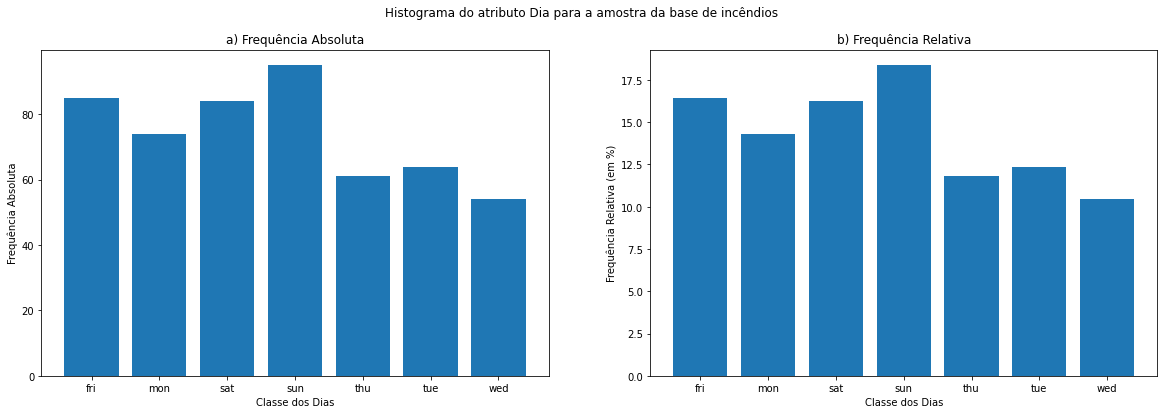

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))

axes[0].bar(classesDay,dfDistFreqDay["Frequência Absoluta"])
axes[0].set_title("a) Frequência Absoluta")
axes[0].set(xlabel = "Classe dos Dias", ylabel = "Frequência Absoluta")
axes[1].bar(classesDay,dfDistFreqDay["Frequência Relativa"])
axes[1].set_title("b) Frequência Relativa")
axes[1].set(xlabel = "Classe dos Dias", ylabel = "Frequência Relativa (em %)")


fig.suptitle("Histograma do atributo Dia para a amostra da base de incêndios")
fig.show()

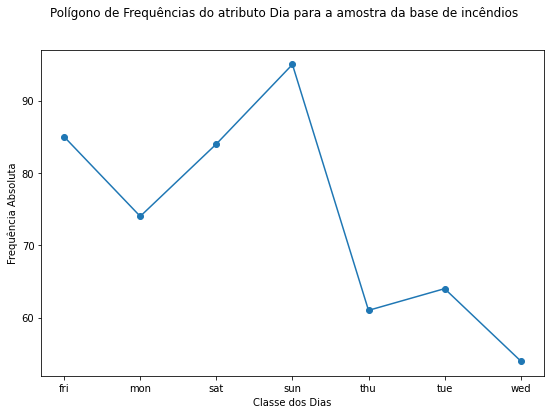

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(classesDay,dfDistFreqDay["Frequência Absoluta"],marker='o')
plt.xlabel("Classe dos Dias")
plt.ylabel("Frequência Absoluta")
plt.suptitle("Polígono de Frequências do atributo Dia para a amostra da base de incêndios")
plt.show()

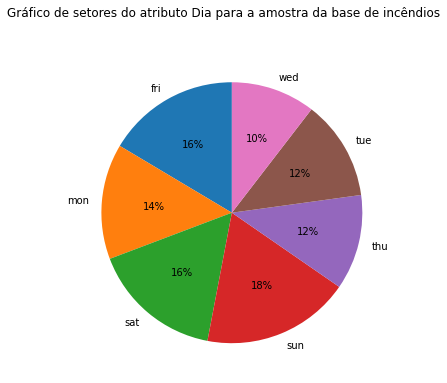

In [ ]:
plt.figure(figsize=(9, 6))
plt.pie(x=dfDistFreqDay['Frequência Relativa'], labels=classesDay, autopct='%.0f%%',startangle=90)
plt.suptitle("Gráfico de setores do atributo Dia para a amostra da base de incêndios")
plt.show()

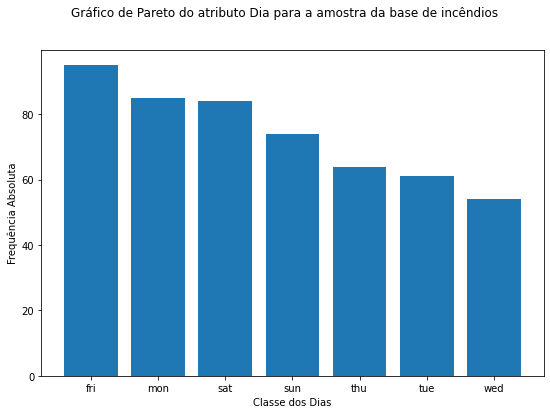

In [ ]:
plt.figure(figsize=(9, 6))
plt.bar(classesDay,dfDistFreqDay.sort_values(by='Frequência Absoluta',ascending=False)["Frequência Absoluta"])
plt.xlabel("Classe dos Dias")
plt.ylabel("Frequência Absoluta")

plt.suptitle("Gráfico de Pareto do atributo Dia para a amostra da base de incêndios")
plt.show()

##### Atributo Mês: Histograma e Gráficos de Polígonos, de Setores e de Pareto

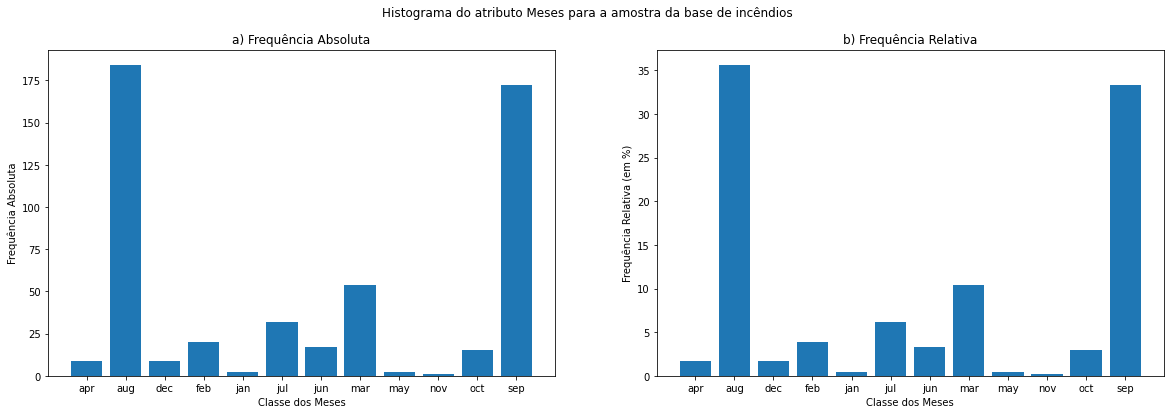

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))

axes[0].bar(classesMonth,dfDistFreqMonth["Frequência Absoluta"])
axes[0].set_title("a) Frequência Absoluta")
axes[0].set(xlabel = "Classe dos Meses", ylabel = "Frequência Absoluta")
axes[1].bar(classesMonth,dfDistFreqMonth["Frequência Relativa"])
axes[1].set_title("b) Frequência Relativa")
axes[1].set(xlabel = "Classe dos Meses", ylabel = "Frequência Relativa (em %)")


fig.suptitle("Histograma do atributo Meses para a amostra da base de incêndios")
fig.show()

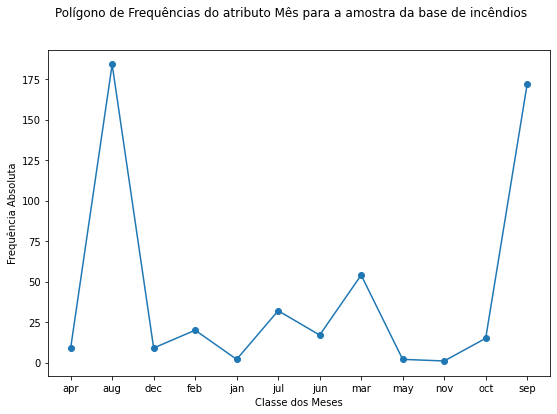

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(classesMonth,dfDistFreqMonth["Frequência Absoluta"],marker='o')
plt.xlabel("Classe dos Meses")
plt.ylabel("Frequência Absoluta")
plt.suptitle("Polígono de Frequências do atributo Mês para a amostra da base de incêndios")
plt.show()

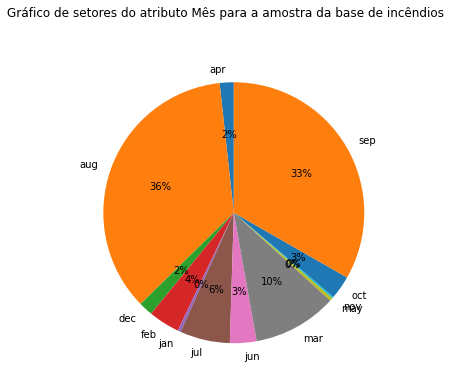

In [ ]:
plt.figure(figsize=(9, 6))
plt.pie(x=dfDistFreqMonth['Frequência Relativa'], labels=classesMonth, autopct='%.0f%%',startangle=90)
plt.suptitle("Gráfico de setores do atributo Mês para a amostra da base de incêndios")
plt.show()

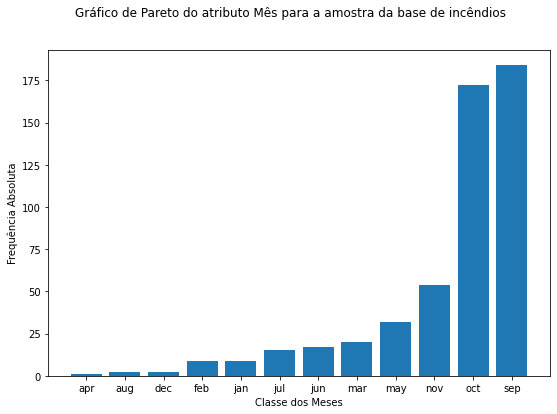

In [ ]:
plt.figure(figsize=(9, 6))
plt.bar(classesMonth,dfDistFreqMonth.sort_values(by='Frequência Absoluta',ascending=True)["Frequência Absoluta"])
plt.xlabel("Classe dos Meses")
plt.ylabel("Frequência Absoluta")
plt.suptitle("Gráfico de Pareto do atributo Mês para a amostra da base de incêndios")
plt.show()

##### Atributo DMC: Histograma e Gráficos de Polígonos, de Setores e de Pareto

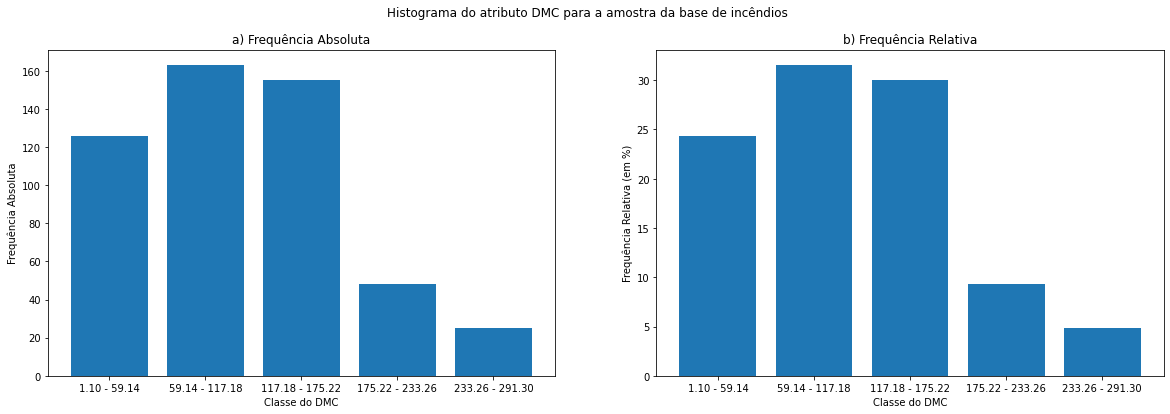

In [ ]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
classeDMC =  [str("{:.2f}".format(dfDistFreqDMC.loc[i,"Limite Inferior"])) + " - " + str("{:.2f}".format(dfDistFreqDMC.loc[i,"Limite Superior"])) for i in range(len(dfDistFreqDMC.values))]

axes[0].bar(classeDMC,dfDistFreqDMC["Frequência Absoluta"])
axes[0].set_title("a) Frequência Absoluta")
axes[0].set(xlabel = "Classe do DMC", ylabel = "Frequência Absoluta")
axes[1].bar(classeDMC,dfDistFreqDMC["Frequência Relativa"])
axes[1].set_title("b) Frequência Relativa")
axes[1].set(xlabel = "Classe do DMC", ylabel = "Frequência Relativa (em %)")


fig.suptitle("Histograma do atributo DMC para a amostra da base de incêndios")
fig.show()

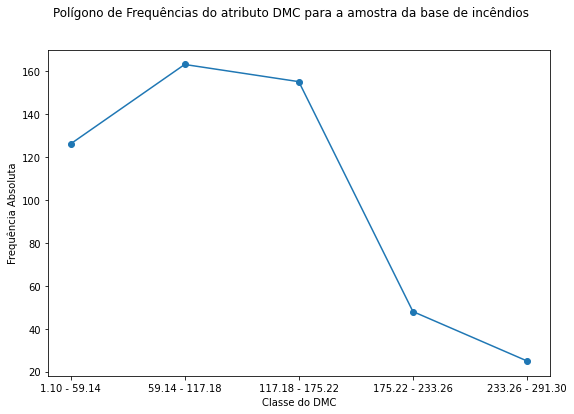

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(classeDMC,dfDistFreqDMC["Frequência Absoluta"],marker='o')
plt.xlabel("Classe do DMC")
plt.ylabel("Frequência Absoluta")
plt.suptitle("Polígono de Frequências do atributo DMC para a amostra da base de incêndios")
plt.show()

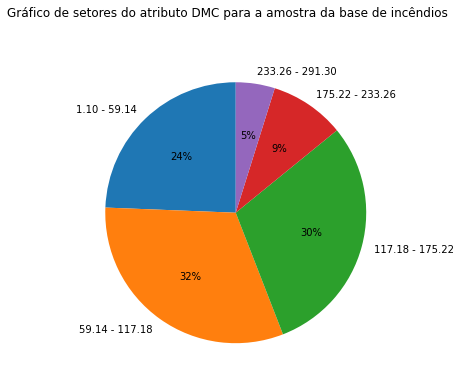

In [ ]:
plt.figure(figsize=(9, 6))
plt.pie(x=dfDistFreqDMC['Frequência Relativa'], labels=classeDMC, autopct='%.0f%%',startangle=90)
plt.suptitle("Gráfico de setores do atributo DMC para a amostra da base de incêndios")
plt.show()

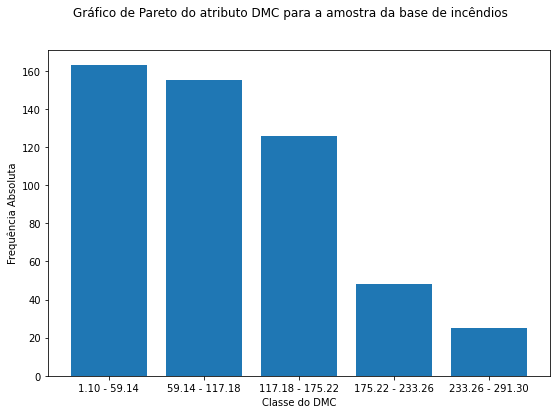

In [ ]:
plt.figure(figsize=(9, 6))
plt.bar(classeDMC,dfDistFreqDMC.sort_values(by='Frequência Absoluta',ascending=False)["Frequência Absoluta"])
plt.xlabel("Classe do DMC")
plt.ylabel("Frequência Absoluta")
plt.suptitle("Gráfico de Pareto do atributo DMC para a amostra da base de incêndios")
plt.show()

##### Atributo DC: Histograma e Gráficos de Polígonos, de Setores e de Pareto

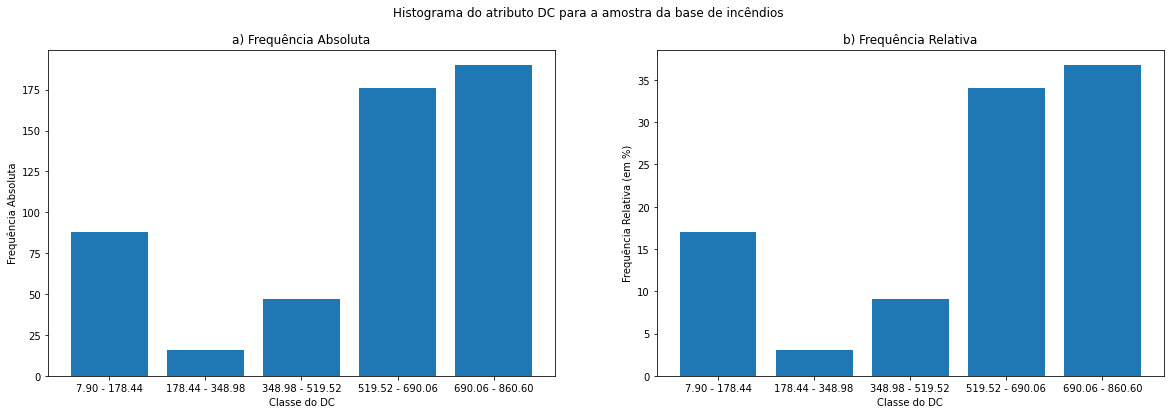

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
classeDC =  [str("{:.2f}".format(dfDistFreqDC.loc[i,"Limite Inferior"])) + " - " + str("{:.2f}".format(dfDistFreqDC.loc[i,"Limite Superior"])) for i in range(len(dfDistFreqDC.values))]

axes[0].bar(classeDC,dfDistFreqDC["Frequência Absoluta"])
axes[0].set_title("a) Frequência Absoluta")
axes[0].set(xlabel = "Classe do DC", ylabel = "Frequência Absoluta")
axes[1].bar(classeDC,dfDistFreqDC["Frequência Relativa"])
axes[1].set_title("b) Frequência Relativa")
axes[1].set(xlabel = "Classe do DC", ylabel = "Frequência Relativa (em %)")


fig.suptitle("Histograma do atributo DC para a amostra da base de incêndios")
fig.show()

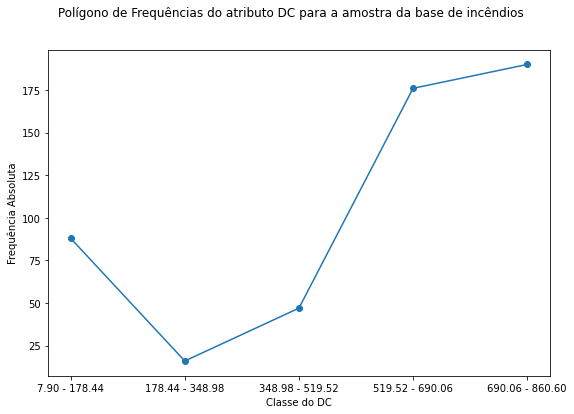

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(classeDC,dfDistFreqDC["Frequência Absoluta"],marker='o')
plt.xlabel("Classe do DC")
plt.ylabel("Frequência Absoluta")
plt.suptitle("Polígono de Frequências do atributo DC para a amostra da base de incêndios")
plt.show()

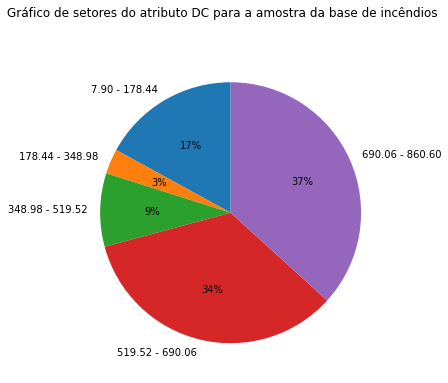

In [ ]:
plt.figure(figsize=(9, 6))
plt.pie(x=dfDistFreqDC['Frequência Relativa'], labels=classeDC, autopct='%.0f%%',startangle=90)
plt.suptitle("Gráfico de setores do atributo DC para a amostra da base de incêndios")
plt.show()

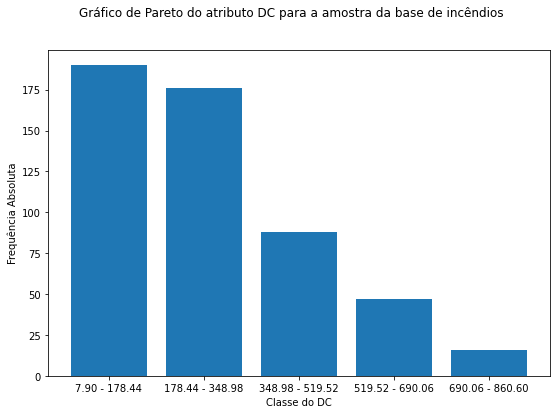

In [ ]:
plt.figure(figsize=(9, 6))
plt.bar(classeDC,dfDistFreqDC.sort_values(by='Frequência Absoluta',ascending=False)["Frequência Absoluta"])
plt.xlabel("Classe do DC")
plt.ylabel("Frequência Absoluta")
plt.suptitle("Gráfico de Pareto do atributo DC para a amostra da base de incêndios")
plt.show()

##### Atributo ISI: Histograma e Gráficos de Polígonos, de Setores e de Pareto

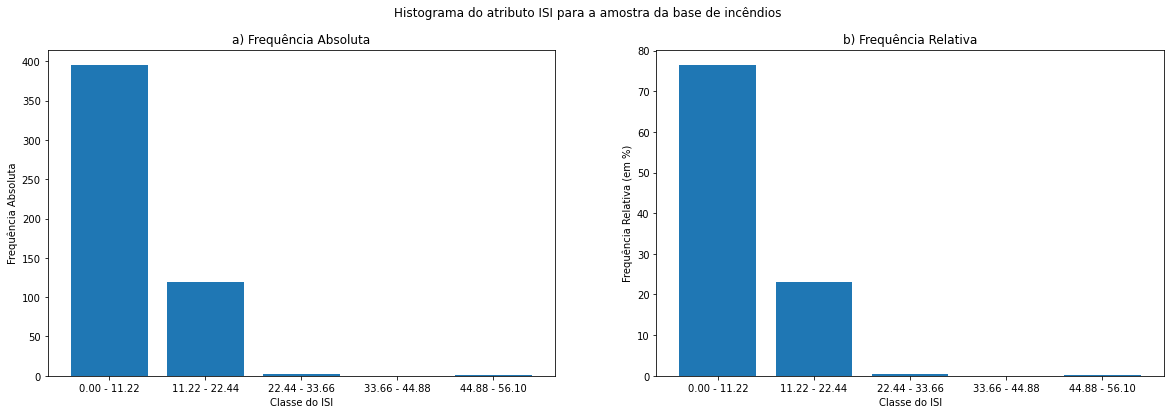

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
classeISI =  [str("{:.2f}".format(dfDistFreqISI.loc[i,"Limite Inferior"])) + " - " + str("{:.2f}".format(dfDistFreqISI.loc[i,"Limite Superior"])) for i in range(len(dfDistFreqISI.values))]

axes[0].bar(classeISI,dfDistFreqISI["Frequência Absoluta"])
axes[0].set_title("a) Frequência Absoluta")
axes[0].set(xlabel = "Classe do ISI", ylabel = "Frequência Absoluta")
axes[1].bar(classeISI,dfDistFreqISI["Frequência Relativa"])
axes[1].set_title("b) Frequência Relativa")
axes[1].set(xlabel = "Classe do ISI", ylabel = "Frequência Relativa (em %)")


fig.suptitle("Histograma do atributo ISI para a amostra da base de incêndios")
fig.show()

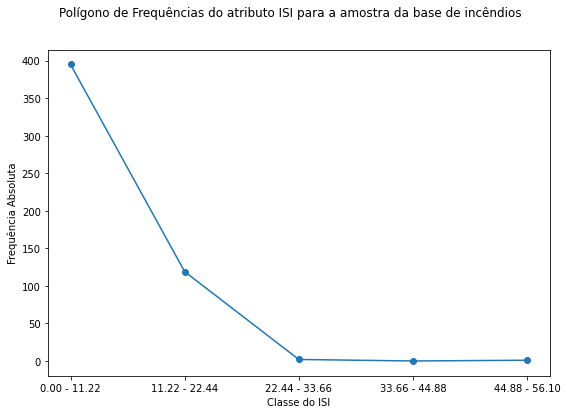

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(classeISI, dfDistFreqISI["Frequência Absoluta"], marker='o')
plt.xlabel("Classe do ISI")
plt.ylabel("Frequência Absoluta")
plt.suptitle("Polígono de Frequências do atributo ISI para a amostra da base de incêndios")
plt.show()

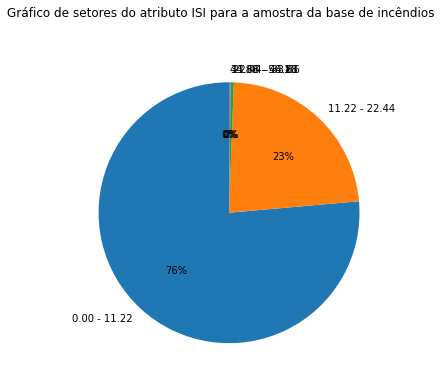

In [ ]:
plt.figure(figsize=(9, 6))
plt.pie(x=dfDistFreqISI['Frequência Relativa'], labels=classeISI, autopct='%.0f%%',startangle=90)
plt.suptitle("Gráfico de setores do atributo ISI para a amostra da base de incêndios")
plt.show()

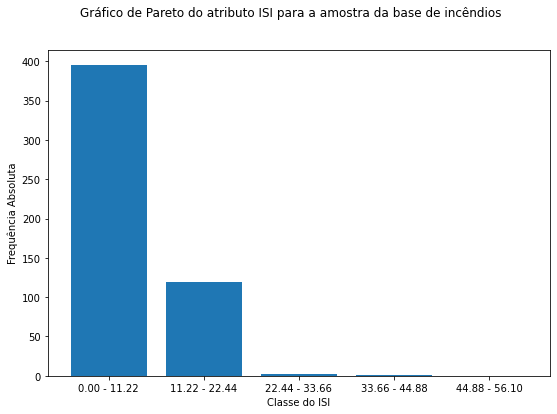

In [ ]:
plt.figure(figsize=(9, 6))
plt.bar(classeISI,dfDistFreqISI.sort_values(by='Frequência Absoluta',ascending=False)["Frequência Absoluta"])
plt.xlabel("Classe do ISI")
plt.ylabel("Frequência Absoluta")
plt.suptitle("Gráfico de Pareto do atributo ISI para a amostra da base de incêndios")
plt.show()

##### Gráficos de Dispersão

###### Atributos: DMC x Dia

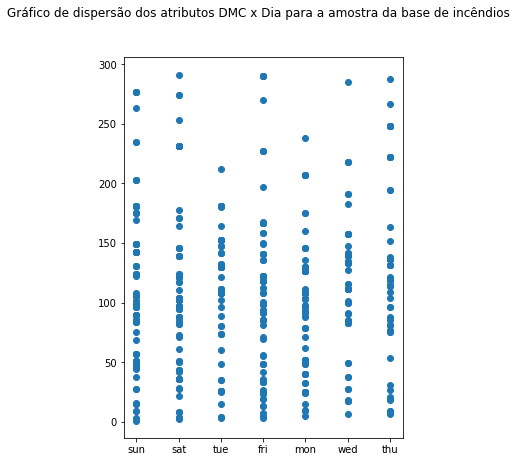

In [ ]:
dfAuxiliar = dfFires.sort_values(by="DMC")
dfAuxiliar = dfAuxiliar.astype({
    "DMC" : float
})
plt.scatter(dfAuxiliar["day"], dfAuxiliar["DMC"])
plt.gcf().set_size_inches(5, 7) 
plt.suptitle("Gráfico de dispersão dos atributos DMC x Dia para a amostra da base de incêndios")
plt.show()

###### Atributos: DMC x Mês

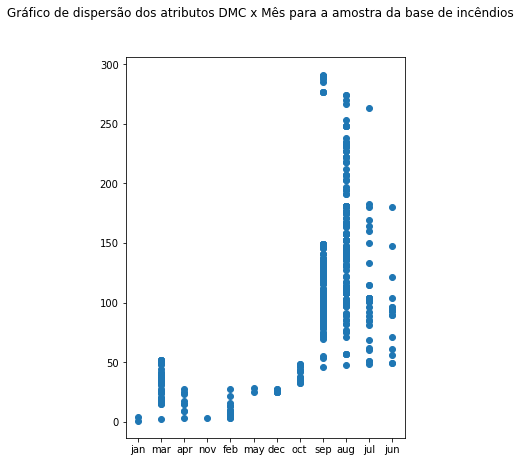

In [ ]:
dfAuxiliar = dfFires.sort_values(by="DMC")
dfAuxiliar = dfAuxiliar.astype({
    "DMC" : float
})
plt.scatter(dfAuxiliar["month"], dfAuxiliar["DMC"])
plt.gcf().set_size_inches(5, 7) 
plt.suptitle("Gráfico de dispersão dos atributos DMC x Mês para a amostra da base de incêndios")
plt.show()

###### Atributos: DMC x DC

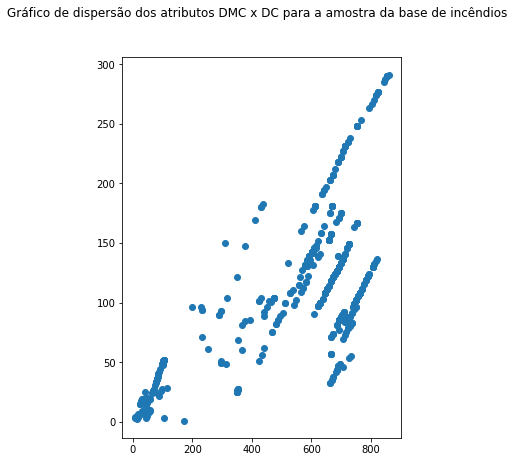

In [ ]:
dfAuxiliar = dfFires.sort_values(by="DMC")
dfAuxiliar = dfAuxiliar.astype({
    "DC" : float,
    "DMC" : float
})
plt.scatter(dfAuxiliar["DC"], dfAuxiliar["DMC"])
plt.gcf().set_size_inches(5, 7) 
plt.suptitle("Gráfico de dispersão dos atributos DMC x DC para a amostra da base de incêndios")
plt.show()

###### Atributos: DMC x ISI

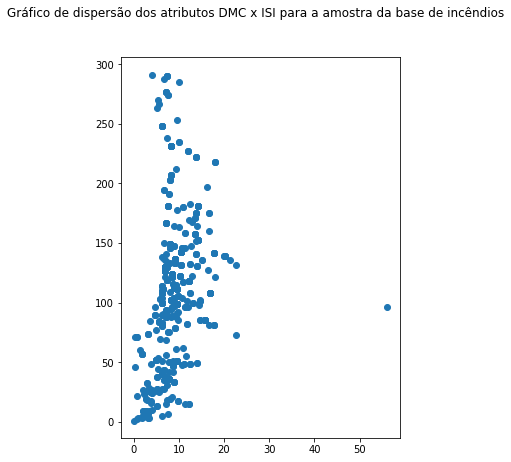

In [ ]:
dfAuxiliar = dfFires.sort_values(by="DMC")
dfAuxiliar = dfAuxiliar.astype({
    "ISI" : float,
    "DMC" : float
})
plt.scatter(dfAuxiliar["ISI"], dfAuxiliar["DMC"])
plt.gcf().set_size_inches(5, 7) 
plt.suptitle("Gráfico de dispersão dos atributos DMC x ISI para a amostra da base de incêndios")
plt.show()

###### Atributos: DC x Dia

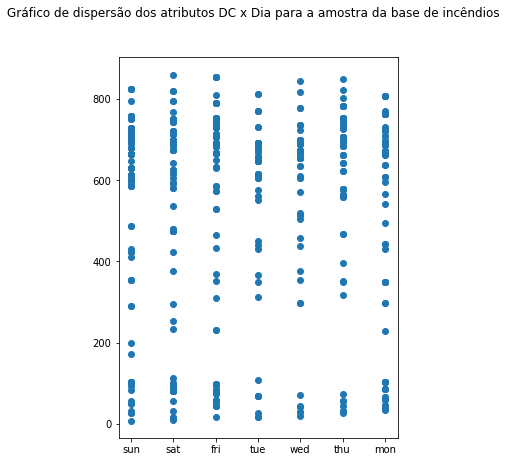

In [ ]:
dfAuxiliar = dfFires.sort_values(by="DC")
dfAuxiliar = dfAuxiliar.astype({
    "DC" : float
})
plt.scatter(dfAuxiliar["day"], dfAuxiliar["DC"])
plt.gcf().set_size_inches(5, 7) 
plt.suptitle("Gráfico de dispersão dos atributos DC x Dia para a amostra da base de incêndios")
plt.show()

###### Atributos: DC x Mês

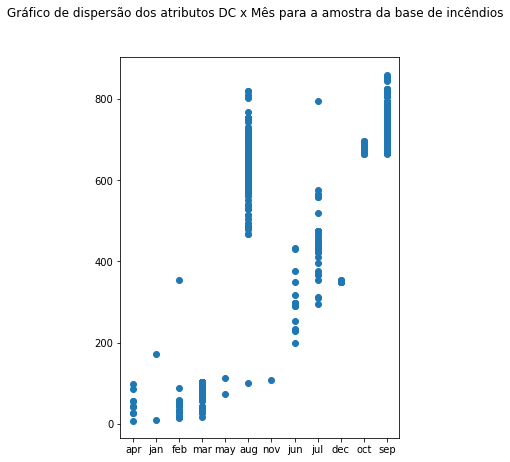

In [ ]:
dfAuxiliar = dfFires.sort_values(by="DC")
dfAuxiliar = dfAuxiliar.astype({
    "DC" : float
})
plt.scatter(dfAuxiliar["month"], dfAuxiliar["DC"])
plt.gcf().set_size_inches(5, 7) 
plt.suptitle("Gráfico de dispersão dos atributos DC x Mês para a amostra da base de incêndios")
plt.show()

###### Atributos: DC x ISI

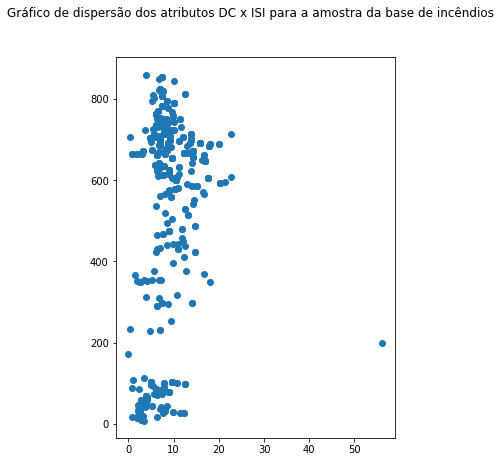

In [ ]:
dfAuxiliar = dfFires.sort_values(by="DC")
dfAuxiliar = dfAuxiliar.astype({
    "ISI" : float,
    "DC" : float
})
plt.scatter(dfAuxiliar["ISI"], dfAuxiliar["DC"])
plt.gcf().set_size_inches(5, 7) 
plt.suptitle("Gráfico de dispersão dos atributos DC x ISI para a amostra da base de incêndios")
plt.show()

###### Atributos: ISI x Dia

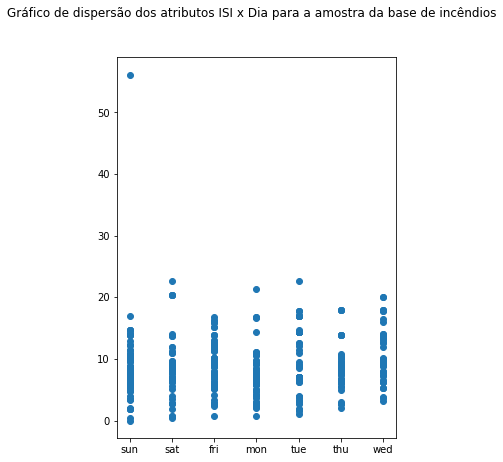

In [ ]:
dfAuxiliar = dfFires.sort_values(by="ISI")
dfAuxiliar = dfAuxiliar.astype({
    "ISI" : float
})
plt.scatter(dfAuxiliar["day"], dfAuxiliar["ISI"])
plt.gcf().set_size_inches(5, 7) 
plt.suptitle("Gráfico de dispersão dos atributos ISI x Dia para a amostra da base de incêndios")
plt.show()

###### Atributos: ISI x Mês

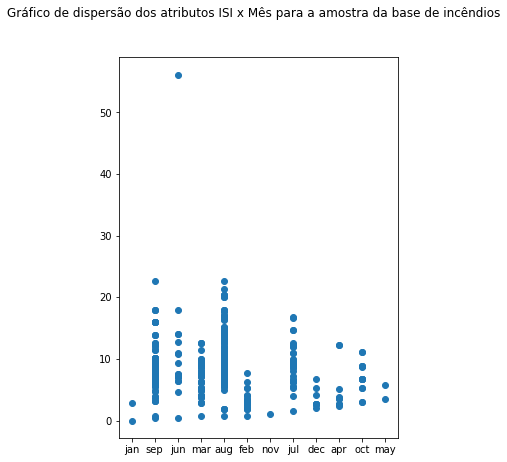

In [ ]:
dfAuxiliar = dfFires.sort_values(by="ISI")
dfAuxiliar = dfAuxiliar.astype({
    "ISI" : float
})
plt.scatter(dfAuxiliar["month"], dfAuxiliar["ISI"])
plt.gcf().set_size_inches(5, 7) 
plt.suptitle("Gráfico de dispersão dos atributos ISI x Mês para a amostra da base de incêndios")
plt.show()

###### Atributos: Dia x Mês

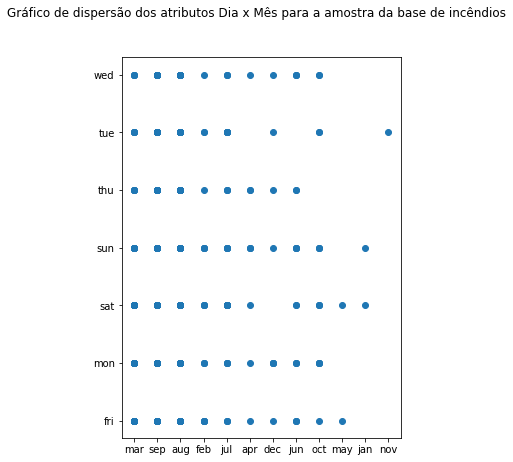

In [ ]:
dfAuxiliar = dfFires.sort_values(by="day")

plt.scatter(dfAuxiliar["month"], dfAuxiliar["day"])
plt.gcf().set_size_inches(5, 7) 
plt.suptitle("Gráfico de dispersão dos atributos Dia x Mês para a amostra da base de incêndios")
plt.show()

#### Exercício 3 - Medidas Resumo

In [ ]:
dfMedidasResumo = pd.DataFrame(columns=['Atributo', 'Média','Moda','Ponto Médio', 'Mediana', 'Amplitude', 'Desvio Padrão', 'Variância', 'Coeficiente de Variação', 'Assimetria', 'Curtose'])

atributosMedidasResumo = ['day', 'month' ,'DMC', 'DC', 'ISI' ]


In [ ]:
for atributo in atributosMedidasResumo:
  dictMedidasResumo = {}
  dictMedidasResumo['Atributo'] = atributo
  
  #Media
  try:
    dictMedidasResumo['Média'] = dfFires[atributo].mean()
  except:
    dictMedidasResumo['Média'] = "Não Possui"

  #Moda
  try:
    dictMedidasResumo['Moda'] = dfFires[atributo].mode()[0]
  except:
    dictMedidasResumo['Moda'] = "Não Possui"
  
  #Ponto Médio
  try:
    dictMedidasResumo['Ponto Médio'] = (dfFires[atributo].max() - dfFires[atributo].min())/2
  except:
    dictMedidasResumo['Ponto Médio'] = "Não Possui"

  #Mediana 
  try:
    dictMedidasResumo['Mediana'] = dfFires[atributo].median()
  except:
    dictMedidasResumo['Mediana'] = "Não Possui"

  #Amplitude
  try:
    dictMedidasResumo['Amplitude'] = dfFires[atributo].max() - dfFires[atributo].min()
  except:
    dictMedidasResumo['Amplitude'] = "Não Possui"

  #Desvio Padrao
  try:
    dictMedidasResumo['Desvio Padrão'] = dfFires[atributo].std()
  except:
    dictMedidasResumo['Desvio Padrão'] = "Não Possui"
  
  #Variancia
  try:
    dictMedidasResumo['Variância'] = dfFires[atributo].var()
  except:
    dictMedidasResumo['Variância'] = "Não Possui"
  
  #Coeficiente de Variacao
  try:
    dictMedidasResumo['Coeficiente de Variação'] = dfFires[atributo].var()/dfFires[atributo].mean()
  except:
    dictMedidasResumo['Coeficiente de Variação'] = "Não Possui"
  
  #Assimetria
  try:
    dictMedidasResumo['Assimetria'] = dfFires[atributo].skew()
  except:
    dictMedidasResumo['Assimetria'] = "Não Possui"

  #Curtose
  try:
    dictMedidasResumo['Curtose'] = dfFires[atributo].kurtosis()
  except:
    dictMedidasResumo['Curtose'] = "Não Possui"

  
  dfMedidasResumo = dfMedidasResumo.append(dictMedidasResumo,ignore_index=True)

dfMedidasResumo

,Atributo,Média,Moda,Ponto Médio,Mediana,Amplitude,Desvio Padrão,Variância,Coeficiente de Variação,Assimetria,Curtose
0,day,Não Possui,sun,Não Possui,Não Possui,Não Possui,Não Possui,Não Possui,Não Possui,Não Possui,Não Possui
1,month,Não Possui,aug,Não Possui,Não Possui,Não Possui,Não Possui,Não Possui,Não Possui,Não Possui,Não Possui
2,DMC,110.872,99,145.1,108.3,290.2,64.0465,4101.95,36.9971,0.547498,0.204822
3,DC,547.94,745.3,426.35,664.2,852.7,248.066,61536.8,112.306,-1.10045,-0.245244
4,ISI,9.02166,9.6,28.05,8.4,56.1,4.55948,20.7888,2.30432,2.53633,21.458


#### Exercício 4 - Diagrama de caixa (box plot)

###### Boxplot: Dia

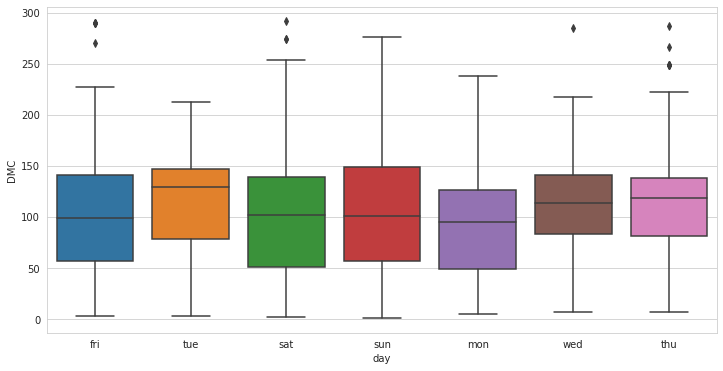

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.boxplot(x='day',y='DMC',data=dfFires)

###### Boxplot: Mês

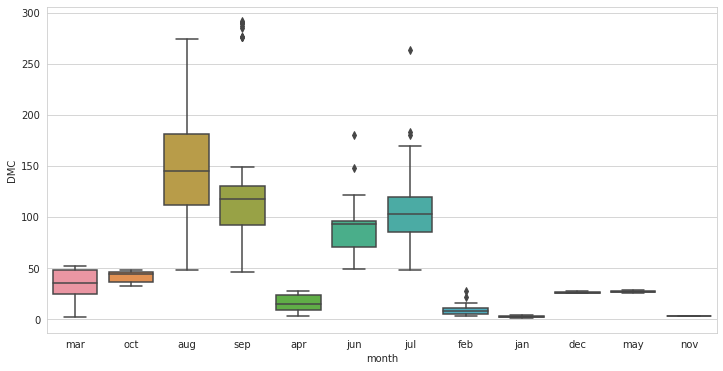

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.boxplot(x='month',y='DMC',data=dfFires)

###### Boxplot: DMC

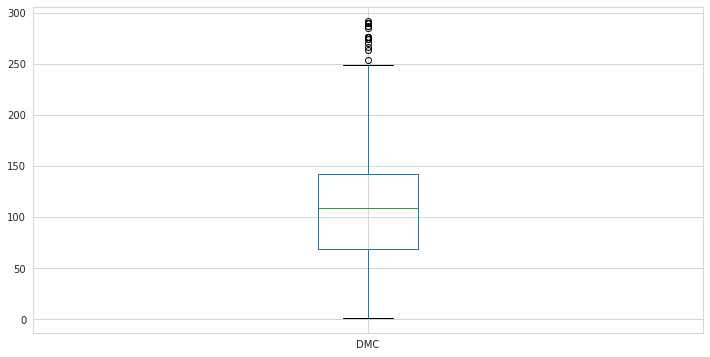

In [ ]:
plt.figure(figsize=(12,6))
dfAuxiliar = dfFires["DMC"]
dfAuxiliar.plot(kind="box")
plt.show()

###### Boxplot: DC

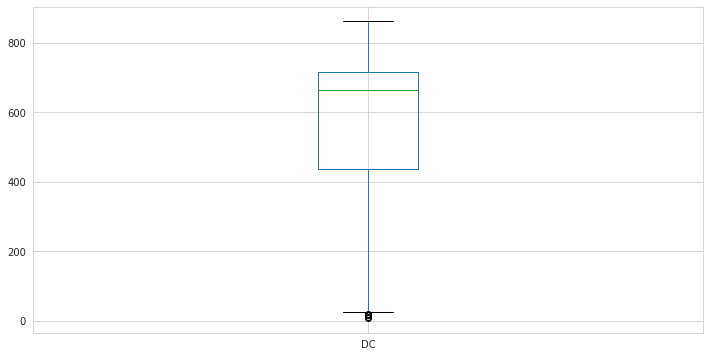

In [ ]:
plt.figure(figsize=(12,6))
dfAuxiliar = dfFires["DC"]
dfAuxiliar.plot(kind="box")
plt.show()

###### Boxplot: ISI

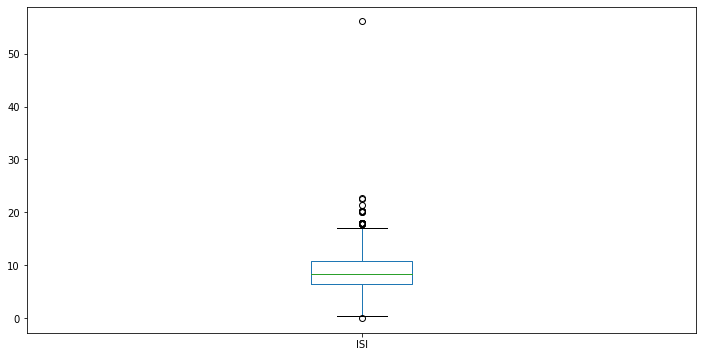

In [ ]:
plt.figure(figsize=(12,6))
dfAuxiliar = dfFires["ISI"]
dfAuxiliar.plot(kind="box")
plt.show()

#### Exercício 5 - Medidas de associação

###### Dispersão: Dia e Mês

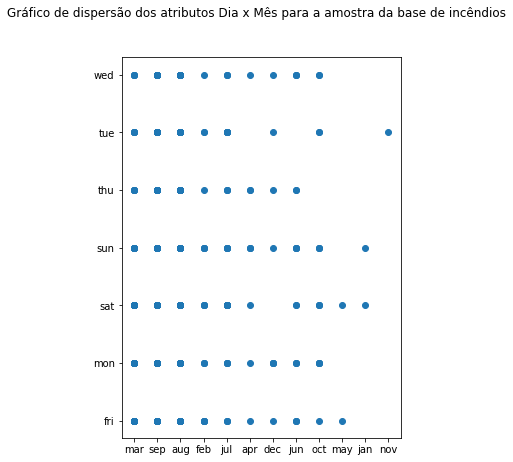

In [ ]:
dfAuxiliar = dfFires.sort_values(by="day")

plt.scatter(dfAuxiliar["month"], dfAuxiliar["day"])
plt.gcf().set_size_inches(5, 7) 
plt.suptitle("Gráfico de dispersão dos atributos Dia x Mês para a amostra da base de incêndios")
plt.show()

###### Dispersão: DMC e DC

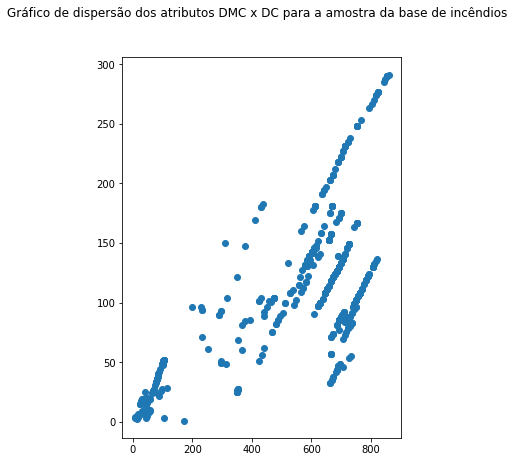

In [ ]:
dfAuxiliar = dfFires.sort_values(by="DMC")
dfAuxiliar = dfAuxiliar.astype({
    "DC" : float,
    "DMC" : float
})
plt.scatter(dfAuxiliar["DC"], dfAuxiliar["DMC"])
plt.gcf().set_size_inches(5, 7) 
plt.suptitle("Gráfico de dispersão dos atributos DMC x DC para a amostra da base de incêndios")
plt.show()

###### Dispersão: DMC e ISI

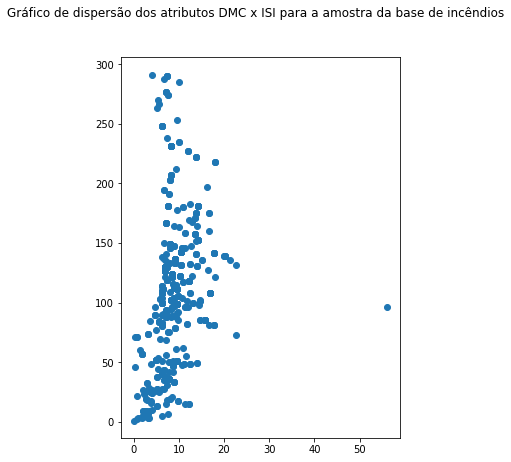

In [ ]:
dfAuxiliar = dfFires.sort_values(by="DMC")
dfAuxiliar = dfAuxiliar.astype({
    "ISI" : float,
    "DMC" : float
})
plt.scatter(dfAuxiliar["ISI"], dfAuxiliar["DMC"])
plt.gcf().set_size_inches(5, 7) 
plt.suptitle("Gráfico de dispersão dos atributos DMC x ISI para a amostra da base de incêndios")
plt.show()

###### Dispersão: DC e ISI

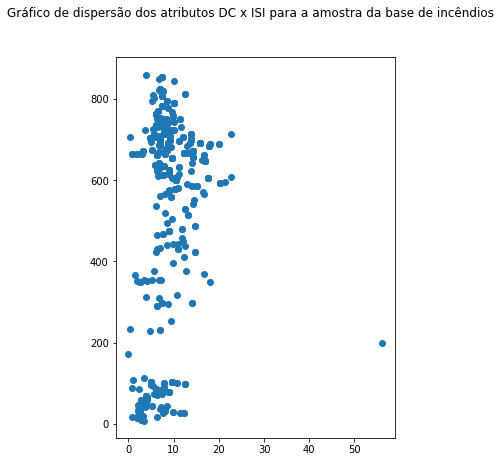

In [ ]:
dfAuxiliar = dfFires.sort_values(by="DC")
dfAuxiliar = dfAuxiliar.astype({
    "ISI" : float,
    "DC" : float
})
plt.scatter(dfAuxiliar["ISI"], dfAuxiliar["DC"])
plt.gcf().set_size_inches(5, 7) 
plt.suptitle("Gráfico de dispersão dos atributos DC x ISI para a amostra da base de incêndios")
plt.show()